# Solutions to Applied Statistics Assessment

In [65]:
# Random selections
import random

# Dataframes
import pandas as pd

# Numerical structures and applications
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Plotting
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

# Mathematical functions.
import math

In [66]:
# Set the style for all plots.
sns.set_style("whitegrid")

# Set the colour palette. 
#sns.set_palette("hls", 8)

This notebook contains the solutions to four problems that are the assessment for the Applied Statistics module for a Higher Diploma in Data Analytics at Atlantic Technological University.

The problems are:
- [Extending the Lady Tasting Tea](#problem-1-extending-the-lady-tasting-tea)
- [Normal Distribution](#problem-2-normal-distribution)
- [t-Tests](#problem-3-t-tests)
- [ANOVA](#problem-4-anova)

## Problem 1: Extending the Lady Tasting Tea

### __Brief__ 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Background

The lady tasting tea is a famous statistical experiment devised by [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to investigate a woman's claim that she could distinguish whether milk was poured first into a cup of tea or if the tea was poured in first. This [Irish TImes article](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) provides a easy to understand explanation of the lady tasting tea experiment for the non-statistician.

In the original experiment eight cups of tea were presented to the lady - four with milk first and four with tea first. They were identical in all other respects and were presented in a _random_ order. Fisher aimed to calculate the probability, _p_ that the lady was selecting the four milk first cups purely by chance.

[Probability](https://statisticsbyjim.com/probability/probability-fundamentals/), ``p-value`` is the measure of likelihood of an event occurring, expressed as a value between 0 and 1, where 0 is impossible and 1 is certain. 

As part of this experiment, Fisher introduced the ``null hypothesis``, _H<sub>0</sub>_ and the ``alternative hypothesis``,  _H<sub>a</sub>_. The null hypothesis is the default position and is assumed to be true unless proven otherwise. The alternative hypothesis opposes the null hypothesis and assumes a relationship between the variables. As stated in this article, [Alternative Hypothesis: Definition, Types and Examples](https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/)  
>"The null and alternative hypotheses are exhaustive, meaning that together they cover every possible outcome. They are also mutually exclusive, meaning that only one can be true at a time".

For the original lady tasting tea experiment the null hypothesis and the alternative hypothesis are as follows:

>__Null Hypothesis _H<sub>0</sub>_:__
>
>* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
>* The lady is selecting the four cups from eight at random.
>
>__Alternative Hypothesis _H<sub>a</sub>_:__
>* The lady can tell the difference. 


At the outset of the experiment Fisher also chose a ``significance level``, α of 0.05. As he states in page 13 of [The Design of Experiments](https://home.iitk.ac.in/~shalab/anova/DOE-RAF.pdf): 
>"It is open to the experimenter to be more or less exacting in respect of the smallness of the probability he would require before he would be willing to admit that his observations have demonstrated a positive result". 

StatisticsByJim.com defines the [Significance level](https://statisticsbyjim.com/glossary/significance-level/) as follows:
> The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. The probability of rejecting the null hypothesis when it is true. 
> For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.

This can be summarised as:
* If __p ≤ α__ reject the null hypothesis.
* If __p > α__ fail to reject the null hypothesis.

With a significance level of 0.05, there is a 5% risk of concluding that a difference exists when there is no actual difference. 

Statistical significance indicates that an effect you observe in a sample is unlikely to be the product of chance. For statistically significant results, you can conclude that an effect you observe in a sample also exists in the population. 

``Randomisation`` of the order of the cups and the order in which the cups were presented to the lady is a key component of the experiment. In the [The historical and statistical significance of the lady tasting tea experiment](https://jyyna.co.uk/lady-tasting-tea/) the author notes that:

>"The randomization of the order of cups was crucial to prevent any bias or pattern recognition that could influence the results." 

Randomisation eliminates selection bias which ensures that each cup has an equal chance of being selected and facilitates statistical analysis as statistical tests assume randomness. As an aside, the author replicated the experiment with his friends - none of them could match the lady's accuracy!

[Combinatorial maths](https://www.geeksforgeeks.org/engineering-mathematics/combinatorics/) can be used to calculate the probability of the lady selecting at random the four milk in first cups from eight cups. The [class lecture notes by Ian McLoughlin](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) provides a detailed explanation of how to perform this calculation with Python.

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

where:
* ${n}$ is the total number of cups 
* ${k}$ is the number of cups with milk in first. 

The probability, _p_ of correctly identifying at random all four milk first cups, where ${n}$ is 8 and ${k}$ is 4 is 1/70. 

$$p = \frac{1}{70} \approx 0.014$$

Since this p-value (0.014) is below the 0.05 significance level, we reject the null hypothesis. Because she correctly identified all four cups, the evidence supports the conclusion that she can distinguish whether milk or tea was poured first.

### Solution

Solving this problem involves the following steps:
* Define the null hypothesis, the alternative hypothesis and the significance level.
* Set the number simulations.
* Set up a counter to track the number of successful outcomes and repeat the following:
  * Create twelve cup labels.
  * Shuffle the labels.
  * Select four cups that are milk in first.
  * Select the guess as to which cups are milk in first.
  * Compare results and record as a success if the milk in first array matches the guess array. 
* Calculate the probability and compare the value with the significance level.

The problem requires the use of numpy to simulate the experiment of choosing four cups of milk in first from twelve cups of tea. 

* __Define the null hypothesis, the alternative hypothesis and the significance level.__
  
   >__Null Hypothesis _H<sub>0</sub>_:__
   >* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
   >* The lady is selecting the four cups from twelve at random.
   >

   >__Alternative Hypothesis _H<sub>a</sub>_:__
   >* The lady can tell the difference. 
   >

   >__Significance level, α:__ 0.05

In [67]:
# Set the significance level, alpha.
alpha = 0.05

* __Set the number of times to simulate the experiment.__ 
   
   Repetition is important because running the experiment many times reduces the effect of randomness and gives more stable estimate of the true probability. By repeating the simulation 10,000,000 times, the results become far more reliable and closely reflect the underlying theoretical value.

In [68]:
# Total number of simulations.
num_simulations = 10_000_000

* __Set up a counter to track the number of successful outcomes.__ 

In [69]:
# Count the number of times the guess matches the milk in first selection.
success = 0

The following steps will be repeated by the number of simulation runs. 

* __Create cup labels:__
  
  Set up a numpy array with 12 labels from 0 to 11 inclusive with ``numpy.arange``. 
  
  The numpy.arange function (see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)) returns an array of evenly spaced values within a given interval.  
  
  This array will represent the labels on the twelve cups. The stop value is excluded from the array. 
 
   ```python
   numpy.arange([start, ]stop, [step, ]dtype=None)
   ```

In [70]:
# Generate an array of 12 values from 0 to 11 (inclusive). 
example = np.arange(12)
example

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

* __Shuffle the labels:__ 

   The brief states that the arrays must be shuffled many times. This is accomplished using [numpy.random.shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) which randomly shuffles the labels. This function modifies the array in place and each run may produce a different permutation. 

In [71]:
# Shuffle an array.
np.random.shuffle(example)
example

array([ 3,  9, 11,  0,  7,  6,  2, 10,  5,  8,  1,  4])

* __Select cups for milk in first:__
   
  Choose four labels from the cups array to be milk in first. 

   To choose four cups from the array, the function, ``numpy.random.choice`` was used. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) states that ``numpy.random.choice`` generates a random sample from a given 1-D array.
   
   It has three parameters:

   ```python 
   numpy.random.choice(a, size=None, replace=True, p=None)
   ```
    
   * __a:__ the array to sample from

   * __size:__ the number of elements to select

   * __replace:__ either True or False. 
    
   If ``replace = True``, the function samples with replacement therefore the same value can be returned more than once. This is the default.
   
   For this experiment ``replace = False`` as we want to sample without replacement. Each value can only appear once. Once a cup is chosen, it is not replaced back into the array. 

In [72]:
# Draw 3 random values from the range 0 to 4 inclusive. 
np.random.choice(5, 3, replace=True)

array([3, 3, 0], dtype=int32)

In [73]:
#  Draw 3 random values from the range 0 to 4 inclusive, sampling without replacement.
np.random.choice(5, 3, replace = False)

array([1, 2, 0], dtype=int32)

[np.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) returns a sorted copy of an array. By sorting both arrays, we simplify the comparison between the guess and the milk in first arrays. The position of the element matters when comparing arrays.

In [74]:
# Values are chosen and the array is sorted in place.
np.sort(np.random.choice(5, 3, replace = False))

array([2, 3, 4], dtype=int32)

* __Select the guess:__
  
  In the next step, four cups are randomly selected to represent the guess of which four cups are milk first. The functions ``numpy.random.choice`` and ``numpy.sort`` are used to randomly select and sort four labels from the cups array. 

* __Compare results:__ 
 
Compare the milk first array with the guess array using ``numpy.array_equal``. This function, [numpy.array_equal](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) compares two arrays element-wise, which is why both arrays were sorted in the previous steps. 

It returns ``True`` if the two arrays have the same shape and elements. 

```python
numpy.array_equal(a1, a2, equal_nan=False)[source] where a1 and a2 are the arrays
```

Other methods to compare arrays are discussed in this question on [stackoverflow](https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise). Suggested methods included use of ``numpy.all`` and ``numpy.equiv``.

In [75]:
# Two arrays with the same elements but in different orders.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 5, 4]

# Compare the arrays element-wise.
# Returns False because the order of the elements differs.
np.array_equal(a1, a2)

False

In [76]:
# Two arrays with the same elements and positions.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 4, 5]

# Compare the arrays element wise.
# Returns True as the elements and positions match.
np.array_equal(a1, a2)

True

* __Record success:__ 
  
  If the arrays match, record the result as success. A success occurs when the four guessed cups match the four milk first cups. 

* __Repeat the process__.

Repeat the above process of creating the array of 12 cups, shuffle the array, select four milk first cups, guess which cups are milk first and compare the guess array with the milk first array. 

In [77]:
# Run the simulation multiple times to calculate the frequency of successful outcomes.
for _ in np.arange(num_simulations):

    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    # Sort the array in ascending order.
    milk_first_cups = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    # Sort the array in ascending order.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk_first_cups, guess):
        success += 1

In [78]:
# Show the number of successful outcomes. 
f'There were {success} successful outcomes from {num_simulations} simulations.'

'There were 20294 successful outcomes from 10000000 simulations.'

* __Calculate the probability with the following formula:__
 
    $$p = \frac{success}{no.\;of\;simulations}$$

In [79]:
# Calculate the probability of success.
p_value = success/num_simulations
print(f'The probability of the lady correctly selecting the four milk first cups at random from twelve cups is: {p_value}.')

The probability of the lady correctly selecting the four milk first cups at random from twelve cups is: 0.0020294.


The probability of the lady correctly selecting the four milk first cups from twelve by random guessing is 0.002 or a 2 in a 1000 chance. This compares to a probability of 0.014 for the original eight cup experiment. Since the probability is below the significance level (α = 0.05), there is sufficient evidence to reject the null hypothesis if the lady does correctly identify the four milk first cups. We can then conclude that the lady can tell the difference between the milk first and tea first cups. 

In [80]:
def print_hypothesis_test_result(p_value, alpha):
    if p_value <= alpha:
        print(f'p_value, {p_value:.4f} <= alpha, {alpha}: Reject the null hypothesis.')
    else:
        print(f'p_value, {p_value:.4f} > alpha, {alpha}: Fail to reject the null hypothesis.')

In [81]:
print_hypothesis_test_result(p_value, alpha)

p_value, 0.0020 <= alpha, 0.05: Reject the null hypothesis.


* __Discuss consider extending or relaxing the p-value threshold compared to the original design.__
  
The final part of this problem is to consider extending or relaxing the p-value threshold compared to the original design. Choosing the significance level before the experiment is a fundamental part of a statistical analysis, and I would neither extend nor relax the p-value threshold based on the results of the experiment! The question of whether it is ever good to increase the significance level was posed on [StackExchange](https://stats.stackexchange.com/questions/24203/is-it-ever-good-to-increase-significance-level):

> "Suppose you are using $\alpha = 0.01$ as the significance level. If you are not getting significant results, is it better to increase the significance level to $\alpha = 0.05$?" 

I especially like one respondents reply: 

> A farmer had lots of targets painted on the side of his barn with bullet holes perfectly centred in the bullseye. As he explained, "I shoot first and paint the target afterwards." – 
Dilip Sarwate CommentedMar 6, 2012 at 20:33

This captures why adjusting the significance level to decide what is statistically significant after seeing the data is poor practice. The practice of manipulating data or statistical analyses to find statistically significant results is called [p-hacking](https://statisticsbyjim.com/hypothesis-testing/p-hacking/) or [data dredging](https://en.wikipedia.org/wiki/Data_dredging).

Could I have give more consideration to extending or relaxing the threshold level compared to the original experiment at the start of the modified experiment? Possibly. The most commonly used significance levels are 0.05 and 0.01. The choice of significance level is influenced by the consequences of false positive or false negative results. An example of this is given in this article, [Understanding Significance Levels](https://www.statsig.com/blog/understanding-significance-levels-a-key-to-accurate-data-analysis) where in fields like medicine, false negatives can have serious consequences. For this problem, there are no serious consequences of a false negative or a false positive so I see no reason to extend or relax the significance level. 

__REMOVE IF NOT USED__

https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php

The p-value is defined as the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. A small p-value means that 
https://en.wikipedia.org/wiki/P-value

https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/

https://www.investopedia.com/terms/p/p-value.asp

![p-value](img\p-value.jpg)

_Credit https://www.simplypsychology.org/p-value.html_

***

## Problem 2: Normal Distribution

### __Brief__

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof = 1 (sample SD) and with ddof = 0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### __Background__

__Normal Distribution__

The normal distribution follows a symmetrical, bell-shaped curve that measures the probability of seeing a particular value. The apex of the curve is the mean, $\mu$, of the values, and the standard deviation, $\sigma$, measures the spread of the values. The total area under the curve is exactly 1. It is a good model for predicting and understanding real-world data as it describes the distributions of values for many real-world phenomena. This youtube video by Socratica, [Normal distributions explained - with real world examples](https://www.youtube.com/watch?v=xlxaa9YhT6A) is informative and easy to understand. 

A standard normal distribution is a special type of the normal distribution with a mean, $\mu$ = 0, and a standard deviation, $\sigma$ = 1. 

This diagram from geeksforgeeks.org illustrates the difference between a normal distribution and a standard normal distribution.


![Plot of normal distribution and standard normal distribution](img/normal_distribution2.png)

_Credit https://www.geeksforgeeks.org/maths/standard-normal-distribution/_

Many statistical tests rely on the values being transformed into or assumed to follow the standard normal distribution. Transforming values into a standard normal distribution, in a process called standardisation, makes it easier to compare values from different distributions. This youtube video, [Z-Scores, Standardization, and the Standard Normal Distribution (5.3)](https://www.youtube.com/watch?v=2tuBREK_mgE) explains how standardisation is performed with three examples. 

__Mean__

The mean is the average of a set of numbers.

$$
\mu = \frac{\sum\limits_{i=1}^{N} x_i}{n}
$$

Where:

- $\mu$ = mean
- $x_i$ = each observed value
- $n$ = the number of observations

Numpy has the function, [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to calculate the mean along a specified axis. If no axis is specified, the default is to calculate the mean of the flattened array. 

In [82]:
# List of numbers. 
data = [1, 2, 3, 4, 5]

# Calculate the mean.
mean = np.mean(data)

# Show.
print(mean)

3.0


__Standard Deviation__

Standard deviation measures how spread out the data points are. Wikipedia defines [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) as:

> a measure of the amount of variation of the values of a variable about its mean.

* A small standard deviation indicates that the values are very close to and clustered about the mean. 

* A large standard deviation indicates that the values have a wide spread about the mean.

In a normal distribution, the empirical rule, or the 68-95-99.7 rule, tells us how data are spread around the mean:
* About 68% of observations will fall within the first standard deviation ($\mu ± \sigma$)  of the mean
* About 95% within the first two standard deviations ($\mu ± 2\sigma$)
* About 99.7% within the first three standard deviations ($\mu ± 3\sigma$) 


![Diagram depicting the empirical rule](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/08/empirical_rule_graph2.png?w=572&ssl=1)

_Credit statisticsbyjim.com_

__Population vs Sample Standard Deviation__

The calculation of the standard deviation depends on whether the data represents the entire population or a sample of the population. 

The population standard deviation is used when the values are for the entire population. For example, if we measured the height of every person in a country, we would use the formula for the population standard deviation. As we can only measure the height of a portion of the population, the sample standard deviation is used. The sample standard deviation gives an estimate of the population standard deviation. This page on [Standard Deviation on laerd.com](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) contains additional examples on the use of population and sample standard deviation.

Another statistic commonly used when examining a distribution is the variance, $\sigma^2$. The standard deviation is the square root of the variance. Variance is based on the square differences between each data point and the mean. Standard deviation can be easier to explain as it has the same unit as the mean.

### Solution

To solve this problem:
* Generate 100,000 samples of size 10 from the standard normal distribution.
* Calculate the population standard deviation for each row of the sample.
* Calculate the sample standard deviation for each row of the sample.
* Plot a histogram, on the same axes the population standard deviation and the sample standard deviation.
* Discuss the differences between the histograms.
* Explain how you expect these differences to change if the sample size is increased.

* __Generate 100,000 samples of size 10 from the standard normal distribution.__

Numpy's [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal) generates samples from a normal distribution. 

```python
random.normal(loc=0.0, scale=1.0, size=None)

Where:
- loc = mean
- scale = standard deviation
- size = output shape
```

 The ``size`` parameter can be either an integer or a tuple. 

* If it is an integer, numpy returns a 1-dimensional array of that many samples. 

* If it is a tuple, numpy returns an $N$-dimensional array. 
    * The first value in the tuple is the number of rows (or separate samples).
    * The second value is the number of samples in each row. 

For example, the code below generates 2 sets of 10 normally distributed random samples. 

[How to get normally distributed random numbers with numpy ](https://realpython.com/numpy-random-normal/) discusses how to generate and plot histograms of the random numbers generated with random.normal.

In [83]:
# Generate 2 sets of size 10 standard normally distributed values.
example = np.random.normal(loc=0.0, scale=1.0, size=(2, 10))
example

array([[ 1.43059295,  1.23062736, -0.40585434,  1.03661414, -0.70963905,
         0.95745773, -0.40292194, -0.16434321,  0.3984116 , -0.80514114],
       [-2.2757085 ,  0.99163394,  0.59501784, -0.18133793,  0.0998798 ,
         0.37805933,  1.28647935,  0.55051378, -0.55706924, -0.49568411]])

In [84]:
# Generate 100,000 standard normal distributed samples of size 10.
samples = np.random.normal(loc=0.0, scale=1.0, size=(100000, 10))
samples

array([[-0.58329965, -0.00645795,  0.59531265, ..., -1.08587906,
        -0.25502784, -0.77212842],
       [ 0.29094552,  0.27634914,  1.35255137, ..., -0.11532569,
         1.6467057 , -0.98361359],
       [ 1.44998631,  0.05897758,  1.10047677, ..., -1.58327202,
         0.22882309, -1.8986077 ],
       ...,
       [-1.42715056,  0.82346481,  0.29586192, ...,  0.32225642,
        -0.15802999,  1.33055907],
       [ 1.19153383,  0.88613405, -0.30444369, ..., -0.65403433,
        -0.55333779,  0.43697136],
       [ 0.17480005, -0.0065098 , -1.37996512, ...,  1.91747009,
         0.44486841,  0.212908  ]], shape=(100000, 10))

* __Calculate the population and sample standard deviation.__

To calculate the standard deviation along a specified axis [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) is used. 

```python
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
```

Two parameters, ``axis`` and ``ddof`` are necessary to complete this task.

_Axis:_

The standard deviation for the flattened array is calculated by default if no axis is specified.

* If ``axis = 1`` the standard deviation for each row of the array is returned.
* If ``axis = 0``, the standard deviation for each column is returned. 

For this problem, ``axis = 1`` as we want the standard deviation for each row of samples.

_ddof:_

ddof stands for Delta Degrees of Freedom. These are the values that are free to vary. By default ``ddof = 0``, thus calculating the population standard deviation is the default position. 

The sample standard deviation is calculated when  ``ddof = 1``.

If we examine the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) on numpy.std we see that the divisor used in the calculation is $N - ddof$, where $N$ is the number of elements. When ``ddof = 1``, the divisor is Bessel's correction, $N - 1$ and the sample standard deviation is calculated. 

```python
N = len(a)
d2 = abs(a - mean)**2  # abs is for complex `a`
var = d2.sum() / (N - ddof)  # note use of `ddof`
std = var**0.5
```

In [85]:
# Calculate the population standard deviation. 
example = np.std(data, ddof = 0)
print(example)

1.4142135623730951


In [86]:
# Calculate the sample standard deviation. 
example = np.std(data, ddof = 1)
print(example)

1.5811388300841898


As we want the population (``ddof = 0``) and sample (``ddof = 1``) standard deviations for each row, ``axis = 1``.

In [87]:
# Calculate population standard deviation.
population_std_dev = np.std(samples, ddof = 0, axis = 1)

# Show.
population_std_dev

array([0.70100337, 0.84022797, 1.22459197, ..., 0.88188439, 0.91428827,
       0.84965227], shape=(100000,))

In [88]:
# Calculate sample standard deviation.
sample_std_dev = np.std(samples, ddof = 1, axis = 1)

# Show.
sample_std_dev

array([0.73892243, 0.88567805, 1.29083327, ..., 0.92958777, 0.96374446,
       0.89561213], shape=(100000,))

* __Plot histograms of both sets of values on the same axes with transparency.__

Histograms are used for plotting continuous data. A good histogram can indicate if the data has a normal distribution. 

Histograms can be plotted with either matplotlib's, [plt.hist](https://matplotlib.org/stable/gallery/statistics/hist.html) or with seaborn's, sns.hisplot function ([see official documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)). Seaborn is a plotting library built on top of matplotlib. Datacamp has a nice tutorial on making [histograms with seaborn](https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram).


```python
seaborn.histplot(data = None, x = None, y = None, bins = 'auto', alpha = None, kde = False)
```

Seaborn.hisplot was used to create the histograms as seaborn.histplot has the kde parameter which creates a kernel density plot over the histogram. KDE provides a smooth estimate of the data distribution and can be useful for identifying patterns in the data. Matplotlib.hist does not have an equivalent parameter. 

_Alpha_:

The alpha parameter ([see matplotlib documentation](https://matplotlib.org/stable/gallery/color/set_alpha.html)) is used to control the transparency level of a plot. Alpha has a range from 0 (completely transparent) to 1 (fully opaque). 

_Bins_:

Bins in a histogram are the intervals into which a dataset is divided. Selecting the right number of bins is important as the number of bins influences the shape of the plot. If the number of bins is not given, seaborn will create what it thinks is the optimal number of bins. For this plot, too many bins were created with the default setting.

np.linspace was used to specify the number of bins. As the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) states, np.linspace returns evenly spaced numbers over a specified interval.

```python
numpy.linspace(start, stop, num= 50)
```

In [89]:
# Generate an array of 33 values from 0 to 2.0 inclusive.
np.linspace(0.0, 2.0, 33)

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    ])

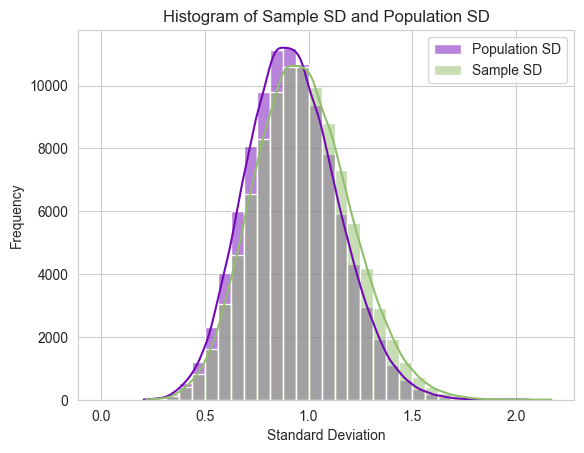

In [90]:
# 
fig, ax = plt.subplots()

# Histogram of the population standard deviations.
sns.histplot(x = population_std_dev, kde=True, bins=np.linspace(0.0, 2.0, 33), alpha = 0.5, label = 'Population SD', color="#7209B7")

# Histogram of the sample standard deviations.
sns.histplot(x = sample_std_dev, kde=True, bins=np.linspace(0.0, 2.0, 33), alpha = 0.5, label = 'Sample SD', color="#90BE6D")

# Title.
plt.title('Histogram of Sample SD and Population SD')

#  Label the x- and y-axis.
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')

#  Display the legend.
ax.legend()

# Show.
plt.show()

* __Describe the differences.__

It is immediately obvious that both plots have a normal distribution - the KDE plot helps with the visualisation.  

The apex of the plot is at the mean, $\mu$. The plot shows that the mean of the population standard deviation is smaller than the mean of the sample standard deviation. This can be confirmed with np.mean. 

In [91]:
# Mean of the population standard deviations.
np.mean(population_std_dev)

np.float64(0.9212890476566833)

In [92]:
# Mean of the sample standard deviations.
np.mean(sample_std_dev)

np.float64(0.971123924654177)

As expected the mean of the population standard deviations, $\mu = 0.92$ is smaller than the mean of the sample standard deviations, $\mu = 0.97$. To explain this difference we need to compare the formulas for the population standard deviation and the sample standard deviation. 

__Population Standard Deviation__

$$\sigma = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \mu)^2}{N}$$

Where:

- $\sigma$ = population standard deviation
- $x_i$ = each data point
- $\mu$ = population mean
- $N$ = total number of data points

__Sample Standard Deviation__

$$s = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \overline{x})^2}{N - 1}$$

Where:

- $s$ = sample standard deviation
- $x_i$ = each data point
- $\overline{x}$ = sample mean
- $N$ = total number of data points

The sample standard deviation is used when the values are for a sample of a population. 

The aim of the sample standard deviation is to give an estimate of the population standard deviation. 

The numerator for both equations involves subtracting either the population mean or the sample mean from a data point. 

To account for the fact that the sample mean, $\overline{x}$ tends to be smaller than the population mean, $\mu$, the formula for sample standard deviation uses a denominator of ${N - 1}$. This adjustment is called Bessel's correction. Its purpose, as stated in this [reddit article](https://www.reddit.com/r/askscience/comments/km51c/what_exactly_does_bessels_correction_do_when/) is to provide an unbiased estimate of the population variance. 

If we were to divide by $N$ instead, the resulting estimate would be consistently too small because the sample mean, $\overline{x}$ is calculated from sample data and is therefore closer to the sample points than the true population mean, $\sigma$. With a small sample, the sample mean, $\overline{x}$ is often a poor estimator of the population mean, $\mu$.  This youtube video, [Why dividing by n underestimates the variance?](https://www.youtube.com/watch?v=sHRBg6BhKjI) explains why Bessel's correction is needed.

In short, dividing by ${N - 1}$ compensates for the fact that we are calculating differences from the sample mean instead of the populations mean, otherwise we would consistently underestimate the variance around the population mean.

* __Explain how you expect these differences to change if the sample size is increased.__

For this problem 100,000 samples of size 10 were generated. If the sample size was increased, I expect that the values for the sample standard deviation would get closer and closer to the population standard deviation.

The formula for sample standard deviation divides by $N-1$, Bessel's correction. This discussion, Intuitive explanation for dividing by $N-1$ when calculating standard deviation? on [stackexchange.com](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation/3934#3934 ) explains the correction effect of $N-1$. The factor $N-1$ has a larger correctional effect when $N$ is small. As $N$ becomes larger the sample mean is likely to be a good estimator of the population mean. 

As the sample size gets larger, the sample mean, $\overline{x}$ gets closer to the true population mean, $\mu$. When the mean is estimated more accurately, the deviations from the mean are computed more accurately, which leads to the sample standard deviation to be a better approximate the population standard deviation.

I would expect that if the sample size was increased the histogram of the sample standard deviation would overlap more with the plot of the population standard deviations.

***

## Problem 3: t-Tests

### Brief

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the type II error rate changes as the difference in means increases.

### Background

__Type II Error__

A [type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors), or a false negative occurs when a test fails to reject the null hypothesis even though it is false. A type II error incorrectly concludes that no effect or difference exists. One example of a false negative is when a patient actually has a disease but tests report that the patient does not. 

[Investopedia.com](https://www.investopedia.com/terms/t/type-ii-error.asp) explains that several factors influence the rate of type II errors, these include sample size, the true population size, and the chosen alpha level. Creating a more stringent criteria for rejecting a null hypothesis could result in a reduction of the type II error but this could result in increasing the type I error, or false positives. 

__t-test__

A [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), also known as the student's t-test, is a statistical test used to determine if there is a significant difference between the means of two groups. 

A t-test helps determine if a difference is a real effect or due to random chance. 

t-Tests assume that the data is normally distributed and a p-value is calculated. 

There are three types of t-tests:

1. One-sample t-test

    Compares the mean of a single sample to a known or hypothesised value.

2. Independent samples t-test
   
    Compares the means of two separate, independent groups.
3. Paired samples t-test
   
    Compare the means of the same group at different times e.g. before and after a medical intervention.

A very useful table on [jmb.com](https://www.jmp.com/en/statistics-knowledge-portal/t-test) summarises the different types of t-tests and provides guidance on how to choose the correct test. 

A t-test returns a test statistic, _t_ from the sample data, which is then used to calculate a probability value, _p-value_. As in problem 1, the _p-value_ is compared with the pre-chosen significant level, $\alpha$ to establish if the result is statistically meaningful.

A t-table or statistical software can be used to find the p-value based on your t-statistic and degrees of freedom. 

In general, a high t-statistic corresponds to a low p-value. 

### Solution

The null hypothesis for an ``independent t-test``, as defined by [laerd.com](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) is:

__Null hypothesis:__ The population means for the two independent populations are equal.

$$H_0: \mu_1 = u2$$

__Alternative hypothesis:__ The means for the two populations are not equal.

$$H_0: \mu_1 \ne u2$$


The __significance level__, $\alpha$, for this problem:.

$$\alpha = 0.05$$

For this problem, we are investigating if the Type II error rate changes as the difference in means increases. 

__The Process__

The process to solve this problem can be summarised as follows:

1. Generate a sample with a standard normal distribution.
2. Generate a sample with a normal distribution with mean, d and standard deviation of 1. 
3. Calculate the p-value for an independent t-test using stats.ttest_ind(). 
4. If the p-value is greater than the significance level, 0.05 the null hypothesis is not rejected.
5. Count the number of times the null hypothesis is not rejected. 
6. Record the proportion of times the null hypothesis is not rejected.  as a proportion of the number of simulations. 
7. This process is repeated 1000 times for each value of d in a range from 0.0 to 1.0.

__Demonstration of Independent t-Test.__

1. Generate samples

In problem 2, I demonstrated how to create a random sample with a normal distribution with ``numpy.random.normal()``. This method will be used again for this problem to generate samples with a standard normal distribution and a normal distribution. 

In [93]:
# Standard normal distribution
standard_normal_sample = np.random.normal(0, 1, 100)

In [94]:
# Normal distribution with mean = 0.1.
demo_sample = np.random.normal(0.9, 1, 100)

2. Carry out independent t-test.

SciPy stands for Scientific Python and is a scientific computation library that uses NumPy underneath. The [w3schools](https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php) tutorial on significance tests is helpful for understanding this problem. 

To run an independent t-test, you can use [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from the SciPy library. 

```python
ttest_ind(a, b, axis = 0)
```
__Parameters__

a, b: arrays with the same shape.

The ttest_ind() returns an object with the t-statistic, p_value and df, the number of degrees of freedom used in the calculation of the t-statistic. 

In [95]:
# Perform independent t-test.
result = stats.ttest_ind(standard_normal_sample, demo_sample)
result

TtestResult(statistic=np.float64(-5.566660889166439), pvalue=np.float64(8.37334724964746e-08), df=np.float64(198.0))

In [96]:
p_value = result[1]
print(p_value)

8.37334724964746e-08


3. Compare p_value with the significance level, alpha. 

In [97]:
# Set significance level.
alpha = 0.05

In [98]:
print_hypothesis_test_result(p_value, alpha)

p_value, 0.0000 <= alpha, 0.05: Reject the null hypothesis.


__The Experiment.__

* __Set the number of times to repeat the simulation.__

The brief states that the experiment must be repeated 1000 times. 

In [99]:
# Number of times to repeat the simulation.
n_simulations = 1000

* __Create a list of d values.__

The simulation must be performed for each mean, _d_ = 0.0, 0.1, 0.2, …, 1.0.

In [100]:
# List of 10 values ranging from 0.0 to 1.0.
mean_d_values = np.arange(0, 1.1, 0.1)
mean_d_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [101]:
# Instantiate a list to measure type II errors.
type_ii_rates = []

# For each mean, d repeat the following:
for d in mean_d_values:

    # Track the number of times the null hypothesis is not rejected.
    failures_to_reject = 0

    for _ in np.arange(n_simulations):

        # Generate a normal standard distribution.
        control_sample = np.random.normal(loc = 0.0, scale = 1.0, size =100)

        # Generate normal distribution with mean, d.
        treatment_sample = np.random.normal(loc = d, scale= 1.0, size = 100)

        # Perform t-test.
        _, p_value = stats.ttest_ind(control_sample, treatment_sample)
        
        # If p_value >= alpha, count as fail to reject.
        if p_value >= alpha:
            failures_to_reject += 1
    
    # Calculate the non-rejection rate after 1000 simulations.
    non_rejection_rate = failures_to_reject/n_simulations

    # Append to the non_rejection_rate list.
    type_ii_rates.append(non_rejection_rate)

In [102]:
type_ii_rates

[0.946, 0.886, 0.717, 0.417, 0.185, 0.062, 0.019, 0.003, 0.0, 0.0, 0.0]

Transforming to a dataframe is not strictly necessary to create the plot but it will simplify the process of extracting data from the plot. 

In [103]:
# Transform to a dataframe. 
df = pd.DataFrame({'d': mean_d_values, 'type_ii_rates': type_ii_rates})
df

,d,type_ii_rates
0,0.0,0.946
1,0.1,0.886
2,0.2,0.717
3,0.3,0.417
4,0.4,0.185
5,0.5,0.062
6,0.6,0.019
7,0.7,0.003
8,0.8,0.000
9,0.9,0.000


In [104]:
sns.set_palette("tab10")

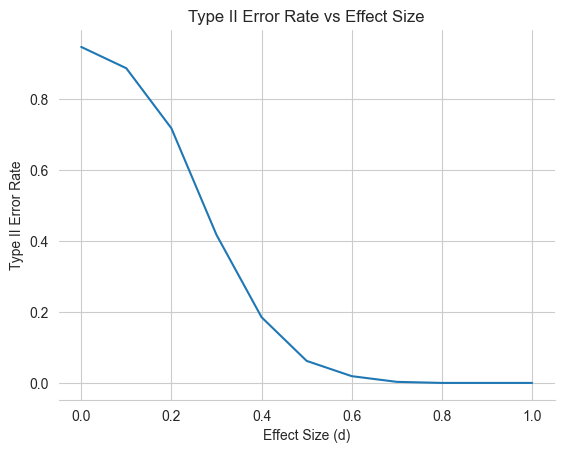

In [105]:
fig, ax = plt.subplots()

plt.plot(df['d'], df['type_ii_rates'])

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title('Type II Error Rate vs Effect Size')
plt.ylabel('Type II Error Rate')
plt.xlabel('Effect Size (d)')
plt.show()

The plot shows that the Type II Error rate decreases as the effect size (mean difference) increases. 

The t-test formula helps explain why this occurs:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}
         {s_{pooled}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

where: 
* ${\bar{X}_1},\, \bar{X}_2 $ = sample means
  
* $n_1, \, n_2$ = sample sizes

* $s_{pooled}$ = pooled standard error

The pooled standard error is the average standard deviation across both groups - add link to this equation. 

This looks very complicated! This youtube, video [Independent Samples t-test](https://www.youtube.com/watch?v=jyoO4i8yUag&t=396s) explains how a t-test is calculated.

This chapter, [The Independent Samples t-Test Formula](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Statistics%3A_Open_for_Everyone_(Peter)/08%3A_Independent_Samples_t-Tests/8.03%3A_The_Independent_Samples_t-Test_Formula) in the book, Statistics for Everyone, explains this expression as:

$$t = \frac{difference\;in\;sample\;means}{pooled\;standard\;error}$$

DO I NEED? This expression is similar to Cohen's d, which is a standardised effect size for measuring the difference between two group means. (https://statisticsbyjim.com/basics/cohens-d/)
$$d = \frac{\bar{X}_1 - \bar{X}_2}{s_{pooled}}$$

The numerator is simply the difference in the sample means!

As the difference between the means, ${\bar{X}_1} - \bar{X}_2$ increases:
* the t-statistic will increase,
* therefore the p-value decreases,
* and it becomes more likely that p <= $\alpha$  and the null hypothesis, _H<sub>0</sub>_ will be rejected.
* so Type II errors decrease. 

If there is no difference between the means, then failing to reject the null hypothesis is correct and not a type II error.

When the difference between the means is small, it makes it more likely to fail to reject the null hypothesis. This increases the probability of a Type II error.

***

## Problem 4: ANOVA

### __Brief__: 

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several t-tests.

### Background

### Solution

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

In [106]:
# First sample.
sample_1 = np.random.normal(loc=0.0, scale=1.0, size=30)

# Second sample.
sample_2 = np.random.normal(loc=0.5, scale=1.0, size=30)

# Third sample.
sample_3 = np.random.normal(loc=1, scale=1.0, size=30)


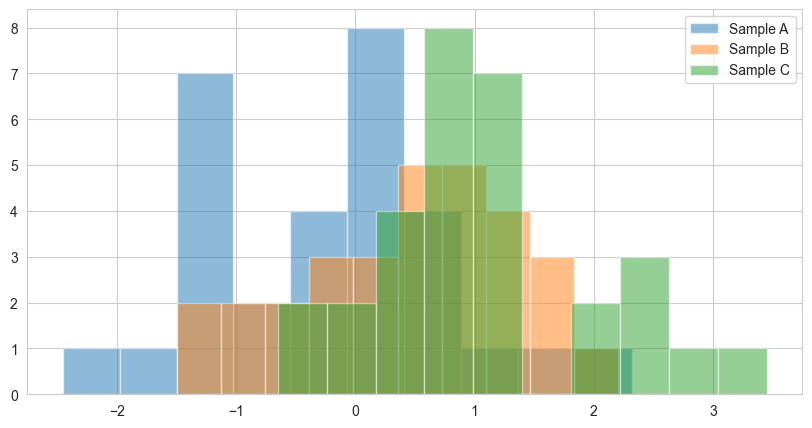

In [107]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_1, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_2, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_3, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [108]:
# Significance level.
alpha = 0.05

Perform one-way Anova

Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3

In [109]:
# Independent samples t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

# Show.
t_statistic, p_value

(np.float64(-2.858808723216241), np.float64(0.005898596900794147))

In [110]:
print_hypothesis_test_result(p_value, alpha)

p_value, 0.0059 <= alpha, 0.05: Reject the null hypothesis.


In [111]:
# Independent samples t-test on sample_1 and sample_3.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_3)

# Show.
t_statistic, p_value

(np.float64(-5.448435732873072), np.float64(1.0836422578871954e-06))

In [112]:
print_hypothesis_test_result(p_value, alpha)

p_value, 0.0000 <= alpha, 0.05: Reject the null hypothesis.


In [113]:
# Independent samples t-test on sample_2 and sample_3.
t_statistic, p_value = stats.ttest_ind(sample_2, sample_3)

# Show.
t_statistic, p_value

(np.float64(-2.745126796343831), np.float64(0.008039532853307902))

In [114]:
print_hypothesis_test_result(p_value, alpha)

p_value, 0.0080 <= alpha, 0.05: Reject the null hypothesis.


End
***